# **Rapid Mix Hydraulic - Potential Energy**

Authors: Cynthia Chu, Dominic Grasso, Yitzy Rosenberg

Team Name: Many Power Corgi Mode

[/Monroe/]: # (Good work exploring hydraulic jump. As you gain more experience you will use the early exploration to very quickly check feasibility so you know whether or not to continue exploring that option. For the hydraulic jump the question is whether their is enough energy available to power a hydraulic jump. Your first design suggests you might have a real problem! But that is great. Check to see if you made any bad assumptions about water depths and if this is the minimum amount of energy that is needed by a hydrualic jump, then you document that including equations in Latex and then move on to a more energy efficiency design. In this case you need to use less energy and thus the maximum velocity in the constricted flow must be MUCH lower.) 

[/Monroe/]: # (When you respond to my comments make the change in the report instead of only addressing it in another comment.)

[/Monroe/]: # (Before writing code show the equations in Latex in Markdown and explain what you are solving for. Showing the equations that you are using is easy and so helpful. I've inserted one equation from the AguaClara textbook below to show how easy it is. NO need to type ANY Latex!)

[/Monroe/]: # (Comment on the results of your design calculaions. Check whether or not the design is reasonable. Reasonable is defined by constraints of the project and goals of reducing cost and resource use.)

[/Monroe/]: # (Push forward quickly on the flocculator design. Consider creating functions for the flocculator design so that you can easily create graphs showing a range of designs. For example the number of treatment trains could be a variable that you might explore.)

See this [equation](https://aguaclara.github.io/Textbook/Flocculation/Floc_Design.html#equation-flocculation-floc-design-25) for the design of the flocculator.
$$H_{e_{Max}} = \left[ \frac{K}{2 \nu G_{CS}^2} \left( \frac{Q \Pi_{{HS}_{Max}}}{W_{channel}} \right)^3 \right]^\frac{1}{4}$$


In [1]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.0MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=9a02a0dcdefdba99bec4ae7d330973a8bdde10596234ce0fb0c7bb944e339374
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=38afb557f570743348266124981c85048ab3a72c72d386661b9c08f8d40a1494
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 2.1MB/s 


In [2]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt

--2020-05-18 01:43:32--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3057 (3.0K) [text/plain]
Saving to: ‘Fairmont.py’

Fairmont.py         100%[===================>]   2.99K  --.-KB/s    in 0s      

2020-05-18 01:43:32 (64.8 MB/s) - ‘Fairmont.py’ saved [3057/3057]



#**Task Definition**

The “Rapid Mix - Potential Energy” (RMPE) team aims to determine both the optimal number and type of mixing units required to evenly distribute coagulant dosages to influent water at the proposed Fairmont Sedimentation Plant (FSP).  While traditional mixing systems are mechanically operated- requiring large energy inputs, the RMPE team proposes harnessing the potential energy of influent water to achieve thorough blending of coagulant nanoparticles.

[/Dominic/]: # (We need to rewrite a lot of this to include for flocculation now, but we haven't gotten to all of it yet)

# **Executive Summary**

Rapid mix is used to mix adhesive nanoparticles uniformly with the raw water, which is especially important if the flow is split between two treatment trains. Rapid mixing also ensures nanoparticles do not self aggregate into microclusters, and that nanoparticles are distributed evenly and uniformly between particles.

Energy invested for rapid mixing processes is significant. Due to high energy consumption, in many cases, the amount of energy used is not practical for gravity-powered water treatment plants. The turbulent eddies in rapid mixing cause stretching and thinning of the concentration gradients, and expansions create energy dissipation that decrease with distance downstream. Intensity of turbulence is characterized by the rate at which mechanical energy is lost to thermal energy, or the mean flow through eddies and viscosity where kinetic energy is converted into heat. 

The compelling reason for rapid mix is for prior to the flow splitting into multiple treatment trains. We aim to determine the optimal number of mixing units in order to maintain a distribution of coagulant that is sufficient for managing the influent water of a potential energy system at the Fairmont Sedimentation Plant. 

[/Monroe/]: # (This cost example isn't relevant here. Use a mechanical design approach for the FSP.)

[/Dominic/]: # (deleted the example)

[/Monroe/]: # (I'm not sure why I said "mechanical" above. I should have said hydraulic. Feel free to delete these three comments!)

RPME takes into account the design constraints outlined in the FSP Scope of Work Document, including gravity flow operations without the use of water pumps, mixing basins constrained to expected flows through the FSP, as well as the constraint of the treatment train design outlined by the LAAWTP engineers. RPME will also minimize the number of chemical storage tanks and mixing tanks necessary to minimize capital, electric, and operational costs. The RPME process design equations will include design considerations such as inner viscous scale to gauge turbulence, energy dissipation rate for determination of height difference within mixing tanks, flow expansion to determine appropriate sizes and velocities of tank entrances and exits and influent water. Finally, our analysis will include designs for physical access to the rapid mixing basins, and an outline of operation requirements for harnessing the potential energy of the influent.

[/Monroe/]: # (What do you mean by height difference within mixing tanks? A big question for your team is number of flocculators and number of rapid mix units.)

[/Dominic/]: # (I think the height difference we were thinking of had to do with the available head -FSP said it had a target of 2 feet major head loss through the plant-.  Originally we were not considering flocculation, but we are now working to incorporate that.)

[/Monroe/]: # (I suspect that the rapid mixing will occur in channels that will not look very much like tanks.)

[/Monroe/]: # (the 2 ft of energy is going to be tight, but I think we can do it. It is also possible that there is some more head available that can be used.)




#**Constraints**

**Regulations and Client Expectations** 

According to the FSP Scope of Work Document, FSP will be operated via gravity flow from both LAA1 and LAA2; therefore, the RMPE team will not consider the use of water pumps in its design.  Additionally, the estimated maximum head loss throughout the entirety of the plant is 2 feet.  The RMPE team must balance its goal of harnessing the potential energy of water to power the rapid mixing process with the constraint of maximum head loss alloted for the plant.  This will require the RMPE team to consider the expected head loss for downstream processes as estimated by the hydraulics subteam.

[/Monroe/]: # (Rapid Mix units rarely use pumps. Excellent connection to the available head. How do you propose to divide that available head between processes? The hydraulics team is charged with moving the water between processes. Which process will use the most energy? How much energy is typically used? Is the amount of energy available sufficient? )

[/Dominic/]: # (In the calculations section for rapid mix I have been working on graphs plotting head as a function of flow rate given different channel design parameters. I haven't figure all of it out yet, but trying to find what would be an appropriate number of channels to maximize the velocity gradient given our flow rate and available headloss.)

The RMPE team must design the mixing basins such that they are functional given the minimum and maximum (720 cfs) expected flows through FSP.  Based upon the last 10 years of available water quality data, the average flow is 320 cfs, so the RMPE team will use 320 cfs as its optimal design parameter for flow.  The flow design flow through each mixing unit is also dependent on the number of proposed treatment trains.  This quantity will be determined to optimize each unit process.  

[/Monroe/]: # (Your design has to be able to handle the maximum and the minimum flow. You can then create graphs showing how your design will perform over that full range of flows. The average flow is probably not an important design parameter for your team. )

[/Dominic/]: # (Thanks for the advice!)

[/Monroe/]: # (In the previous paragraph you state that you will use the average flow as your design. If you do that you will find that the head loss increases by a factor of 4 when the plant goes to max flow. Thus if you use 2 ft of head for the average flow the plant won't be able to work at the max flow. Edit the previous paragraph to reflect this!)


Another design constraint is that the rapid mix tanks will be directly after coarse screening and before the flocculation/sedimentation tanks.  The treatment train design has already been laid out by the LAAWTP engineers.

[/Dominic/]: # (I will update this section once we have fleshed out the calculations a little more.  The more we work on the design calculations, the more insight we have over some of the constraints)

**Site and Budget**

The exact dimensions of the project have yet to be determined; however, it is within the spatial interests of FSP to minimize the number of chemical storage tanks necessary.  As each mixing tank requires its own chemical feed line, the RMPE team aims to minimize the number of mixing tanks which are necessary.  Additionally, the RMPE team will report the expected plan view area for the mixing tanks so that it can be accounted for in overall plant design and changed in future design iterations if too large. 

[/Monroe/]: # (Previous paragraph is confusing. Does your design control the number of chemical storage tanks? You seem to be confusing chemical storage tanks and rapid mix tanks. Do you expect to have rapid mix tanks if you use hydraulic rapid mixing? What is the rapid mix in an AguaClara plant? Note that your design will not look like an AguaClara plant because you will not be using pipes at this scale!)

[/Dominic/]: # (I think we were a little confused on the scope of our portion of the project at the beginning)

[/Monroe/]: # (Edit the previous paragraph and eliminate the goal of minimizing the number of chemical storage tanks. That isn't part of your scope. You can have 20 chemical injection points and still only have 2 chemical storage tanks.)

In the FSP Scope of Work Document, the rate for cubic yards of concrete is placed at 300 USD/CY.  The RMPE team will estimate the expected capital cost (rough estimate) for the number of rapid mix tanks proposed.  Additionally, energy costs are 0.11 USD/kWh at this site.  The RMPE team will estimate the energy savings from forgoing mechanical mixing.  Operational costs are expected to be minimal and associated only with preventative maintenance and repair. 

**Process Capabilities - Process Design Equations** 

Several operating equations will influence the design considerations of this project, including (but not limited to):

1. *Inner Viscous Scale:* the inner viscous scale is a way RMPE can gauge the degree to which turbulence created by influent can mix coagulant.  

  $n = [\frac{v^3}{\varepsilon}]^{0.25}$

[/Monroe/]: # (see https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#turbulent-mixing-time-as-a-function-of-scale where it shows that the slowest eddy turnover time is the large scale eddies. In that section of the textbook we show that turbulence and molecular diffusion can mix the coagulant nanoparticles with the water in a matter of seconds even without using a lot of energy. Transporting the coagulant nanoparticles to particle surfaces is a much slower process and must occur in the flocculator.)

2. *Energy Dissipation Rate:* the energy dissipation rate characterizes the head loss resulting from the dissipation of mechanical energy through viscosity to heat.  Therefore, the energy dissipation rate is a measure of turbulence.  This equation will aid RMPE in determining the effect of height difference within the mixing tanks.

$\bar\varepsilon \theta = g h_L$

[/Monroe/]: # (I am not sure what type of mixing unit you are considering. Seems like that would be helpful to discuss early in this document. How are you planning to create energy dissipation?)  

[/Dominic/]: # (In the open channel design we are planning to create energy dissipation through the minor headloss produced by flow expansion.  This equation was in the MWH textbook linking the average rate of energy dissipation to the lost mechanical energy - measured multiplying the total headloss by gravity.  We have not used this equation so far in our calculations, so I will likely delete it and update this section with the appropriate equations)

[/Monroe/]: # (I am confused by your discussion of rapid mix tanks and especially confused by "height difference within the mixing tanks." There will head loss across flow expansions and those flow expansions will likely be in channels. I'm requesting that you edit the previous paragraph to reflect the use of flow expansions in channels.)

	
3. *Flow Expansion Minor Head Loss:* minor head loss is related to change in flow geometry as opposed to major head loss (which is related to shear at solid boundaries). Since the rapid mixing units aim to convert mechanical energy to thermal energy, it is necessary to increase minor head loss where possible.  As minor losses are produced by flow expansions, the RMPE team must calculate these losses.  This equation will assist RMPE in determining the appropriate areas for tank entrance and exit as well as the approach velocity of influent water. 

  $he = [\frac{Vin^2}{2g}][1-\frac{Ain}{Aout}]^2$

4. *Danckwerts’ Intensity of Segregation (Is):* this is a description of the degree to which two streams have been blended.  RMPE can use this metric to evaluate the degree of blending which occurs under various design scenarios.  While there is not data for this specific project, this statistic could be applied to analogous rapid mix units which are currently operating.  The general description of how completely the streams have been blended can be put the following way:

  $Is = [\frac{sigma(m)}{simga(u)}]^2$

  simga(m) = standard deviation of concentration in blended stream

  simga(u) = standard deviation between two streams in unblended condition

  *   Is = 1, the two streams are completely unblended
  *   Is = 0, the two streams are completely blended

[/Monroe/]: # (The section in the AguaClara text on required mixing time. https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#estimates-of-time-required-for-mixing-processes. That will provide a fluids basis for design if the only goal is to ensure that mixing occurs before flow splitting.)

[/Dominic/]: # (We ended up using 0.3 s as the target mixing time in the design calculations.  We will delete this section and update the document.  I just thought it would be helpful to wait to update this section until we have made more solid progress on the design calculations)

**Ease of Use**

RMPE will allot for walk space around the edge of each basin so that plant operators have unimpaired visual access to the basins.  If any sort of maintenance work is required there will be easy physical access to the rapid mix basins as well. 

**Operation Requirements** 

Ferric chloride and a cationic polymer will be fed into the rapid mix units upstream of the plate settler sedimentation basins.  The rapid mix units will be powered entirely by harnessing the potential energy of influent water, so no pumps/mechanical mixing components will be required for the unit’s operation.

Additionally, if there is not a considerable height difference between the influent and the water in the mixing tank, then a device to avoid backmixing will be necessary. 

[/Monroe/]: # (I'm confident that backmixing will not be a problem. I think a description of how you will create energy dissipation is needed. What methods are used to mix chemicals hydrualically? A list of options is needed.)

**Maintenance Requirements**

There are currently no expected maintenance procedures ascribed to the rapid mix tanks. These units contain no mechanical components requiring maintenance.  If there is any residue buildup, then the mixing units may require periodic cleaning as deemed necessary by plant operators.  Diffuser plates on the chemical inlets into the rapid mix tank may also require some maintenance. 

[/Monroe/]: # (What are the diffuser plates and is that the only option for injecting chemicals?)

# **Physics**

**Solubility**

Solubilty is an essential element of rapid mix. If your pH isn't right the chemicals just won't disolve. Most chemical aditives in the water treatment process are highly polar. 

[/Monroe/]: # (This is backwards! It is critical that the coagulant NOT BE SOLUBLE because if it is dissolved it can act as a glue to hold particles together. Aluminum is amazing because it has a low solubility near neutral pH and that is one of the reasons it makes a great coagulant!)

In order to dissolve and disipate alum bound chemical must be within 6-8 pH.

![alt text](https://aguaclara.github.io/Textbook/_images/Al_solubility.png)

**Physical Physics**

Mixing happens when one piece of fluid irreversibly displaces another piece of fluid. This process in water treatment systems take place through three stages:

1. The inital formation of large eddies.
2. Turbulence to break those eddies into smaller and smaller eddies.
3. Fluid shear whether along pipe walls or during flocculation.
4. Molecular diffusion.


![alt text](https://aguaclara.github.io/Textbook/_images/rapid_mix_macro_to_nano_scale.png)

We will use time scales to form relevant deisgn parametes from the physics behind each stage.


**The inital formation of large eddies**

Large eddies are formed by disturbance in flow. This disturbance causes irreversible energy transfers to heat in the form of dissipation due to the inertial resistance of the viscosity of the fluid. The rate of disipation can be related to amount of deformation as follows:

[$$\bar\varepsilon {=} \nu \bar G^2$$](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#equation-rapid-mix-rm-derivations-24)

Where $\bar\varepsilon$ is the average dissipation, $\nu$ is the visocosity, and $\bar G$ is the average velacity gradient. 

Substituting $\bar\varepsilon$ and solving for its relation to volumetric flow and residence time we get:

[$$P = \rho \bar G^2 \nu Q \theta$$](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#equation-rapid-mix-rm-intro-8)

Where $P$ is power, $\rho$ is density, $Q$ is volumetric flow, and $\theta$ is residence time.

Similaraly substituting the power to change in head eduation we can get gradients as a funtion of differnce in height:

[$$\Delta h=\frac{G^2 \nu \theta}{g}$$](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#equation-rapid-mix-rm-intro-10)

Where $\Delta h$ is the change in head and $g$ is the graviational constant.

** Turbulence to break those eddies into smaller and smaller eddies **

To create this turbulence we need to increase the Reynolds number and to increase the Reynolds number and as before it essentially means we need to have a high energy dissipation rate.

![](https://github.com/yyr2/pics4520/blob/master/Annotation%202020-04-17%20185159.png?raw=true)

[According to P.E.Dimotaka (1999) a Reyknolds $\leq$ 100000 is needed for thurough mixing.](http://dimotakis.caltech.edu/pdf/Dimotakis_JFM2000.pdf) 

Mixing caused by turbulence goes down to 50 times the Kolmogorov length scale (KLC). Once at the KLC, diffusion and wall shear take care of the rest of the mixing. 

[/Monroe/]: # (What Reynolds number do you estimate you will have in your rapid mix unit? It would have been appropriate to at least mention that Reynolds number increases with the scale of the flow.  Wall shear is NOT responsible for mixing. What is the actual mechanism for transport of coagulant nanoparticles to particle surfaces?) 

[/Dominic/]: # (We are expecting a Reynold's number of at least 10,000.  I want to talk to you about this later because I have had difficulty relating Reynolds number to the energy dissipation calculations I have been doing for the flow expansion)

**Fluid shear due to geometry**

Mixing or fluid deformation occurs where ever there is a differential in velocity. Flow across almost any surface and abrupt changes in geometry cause differentials. Examples of common geometries and the types of mixing the occur are: 
* Straight pipe (wall shear) - [uncommon, but included for completeness]
* Coiled tube (wall shear and expansions) - [research scale mixing]
* Series of expansions (expansions) - [hydraulic flocculators]
* Mechanical mixing - [mechanical rapid mix and flocculators]
* Between flat plates (wall shear) - [plate settlers]
* Round jet (expansion) - [hydraulic rapid mix]
* Plane jet (expansion) - [inlet into sedimentation tank]
* Behind a flat plate (expansion) - [mechanical mixers]

Source: [AguaClara Textbook](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#energy-dissipation-rate-velocity-gradient-and-mixing)

For a detailed table of the $h_L$, $\bar G_{cs}$, and $\bar\varepsilon$ per geometry see AguaClara textbook.

**Diffusion** 
The physics of diffusion, while essential for understanding the way coagulant and polymers  collide with particles, is not the driving forces in mixing, especially "rapid mix". For the sake of our analysis we're going to assume the purpose of mixing is to **disperse** and distribute the chemicals as quickly and uniformly as possible. That happens primary as a result of the physical manipulation of fluids and not as chemical interaction that guide the physics of diffusion.

# **Table listing potential strategies to meet the constraints and treatment objectives - Rapid Mix**

[/Monroe/]: # (How else could you create flow expansions in a channel? How about a series of vertical concrete posts that cause flow contractions and then expansions. Inject the coagulant in the middle of the contractions.)

| strategy | advantages  | disadvantages | data needed for decision |
|---|---|---|---|
| Open Channel Flow | Simple | Less Control | Re at flow expansion point |
| Hydraulic Jump | High turbulence | Increased headloss | Expected headloss | 

# **Vendors and contact information file**

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

Add rows to the vendor spreadsheet as you find them. The sheet can easily be edited in Excel. Just make sure to save it as a tab delimited sheet. Push your changes to github so the entire class has access to the document.



In [3]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN
8,flocculator (mech),Sereco,still,pending,http://www.sereco.it/,https://www.directindustry.com/prod/sereco/pro...,05/04/2020,Lynn Li,NaN
9,decanter centrifuge (resid) GN Solids Control...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Shared assumptions - Rapid Mix**

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

Use this file to hold parameters that are in the SOW or elsewhere that
influence the design of the entire plant. This provides an easy mechanism
for all of us to share the same assumptions. Read the SOW to find sections that relate to your part of the design and enter all pertinent variables into [Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py) and then push those changes to github.

# **Major Decisions - Rapid Mix**

The RPME team has discarded the idea of a Venturi mixer and is leaning towards an open-channel rapid mix design due to its simplicity and suitability at the Cottonwood Treatment Plant.

# **Next Steps and Challenges - Rapid Mix**

There are now 4 working designs to work on:
1. **Open-Channel Flow** this is the design in which there are open channels (one for each flocculator) with a single contraction/expansion.  Over the expansion there will be a dispersed chemical input.  It is likely we will not be able to achieve the target retention time in this model as the length scale is larger. Design needs to be renovated to solve for time (target of t = 0.3s) given the length scale.
2. **Hydraulic Jump** The calculations below show that the head loss is reasonable if the channel width is wide enough.  This is not likely to be the most efficient design; however, calculations will be completed to present it as a possibility.  There have been some technical, python difficulties here which have slowed progress.  
3.  **Open-Channel with Pillars** (NOT STARTED) In this design, each flocculator has an open-channel rapid mix tank with pillars in it.  These pillars will be the site of chemical injection.  Calculations need to be done to find the appropriate spacing of pillars.
4. **Open-Channel with Mesh** (NOT STARTED - PENDING) We may not get to this design.  Currently, the idea is that there will be a mesh (to create many small jets) over which there will be an injection.  This is difficult because the injection cannot be in the middle of each of the jets created by the holes in the mesh.  

# **Design - Rapid Mix**



[/Monroe/]: # (Do a quick preliminary design next.) 
[/Dominic/]: #okay!



In [4]:
#provided code 
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy


**Obstructed Channel Flow** 

This is the Rapid Mix design suggested by the Rapid Mix Hydraulic team.  

In [16]:
#list of constraints
t_eddy = 0.3 * u.s
max_head_loss = 0.2 * (u.m)
v_expansion = 0.45 * (u.m/u.s)
number_channels = fmt.n_rm_hyd
channel_depth = 4 * (u.m)

#solve for spatial parameters to satisfy the listed constraints

def req_eddy_length_scale(t_eddy, head_loss):
  """Calculates eddy length scale needed to achieve required mixing time 
  given the available head loss
    ----------------------------------
    - t_eddy: float (units of time)
      - residence time within which mixing must be achieved.  
    - head_loss: float (units of length)
      - this is the maximum headloss alloted for rapid mix process
  """
  L_eddy = (t_eddy*((u.gravity*head_loss)**0.5)).to(u.m)
  print('the required spacing between injection ports is', L_eddy)
  return L_eddy

L_eddy = req_eddy_length_scale(t_eddy, max_head_loss)


def flow_per_injection_port(v_expansion):
  """Assumes that each coagulant injection port will cover an area equal to the 
  square of the eddy length. Multiplying this by the velocity of water after the 
  contraction provides a flow rate for each injection port
    ----------------------------
    - v_expansion: float (units of length per time)
      - this is the velocity of flow downstream from the pillars/injection point;
        it is determined based off flow rate advised by hydraulics team
   """
  flow_per_port = (v_expansion*(L_eddy**2)).to(u.L/u.s)
  print('the flow rate per injection port is', flow_per_port)
  return flow_per_port

flow_per_injection_port(v_expansion)


def req_number_of_ports(number_channel):
  """Calculates the total number of injection ports (including all treatment 
  trains).  Also returns the cross sectional area of each channel.
    --------------------------
    - number_channels: (int)
      - set equal to fmt.n_rm_hyd, but can be altered in order to gauge how
        performance varies with the number of treatment trains  
  """
  max_channel_flow = (fmt.q_max/number_channel).to(u.L/u.s)
  cross_area_channel = max_channel_flow/v_expansion
  number_injection_ports = (cross_area_channel/(L_eddy**2)).to(u.dimensionless)
  print('the number of injection ports per channel is',(np.round(number_injection_ports)).magnitude)
  print('the total number of injection ports is', ((np.round(number_injection_ports)).magnitude)*number_channel)
  return cross_area_channel, number_injection_ports
  
cross_area_channel, number_injection_ports = req_number_of_ports(number_channels)

#contraction width and jet velocity (based off of head loss and expansion velocity)
Pi_A = np.sqrt(2*u.gravity*max_head_loss)/v_expansion + 1
print('The expansion ratio is',Pi_A)
v_jet = v_expansion * Pi_A
w_contraction = (L_eddy/Pi_A).to(u.m)
print('The width of the contractions is',w_contraction)

#diameter of cylinder req under maximum flow condition (assuming half of contraction
#width lies on either side of cylinder)
D_cyl = (L_eddy - w_contraction).to(u.m)
print('The diameter of the cylinder is',D_cyl)

def total_plan_view_area(flocculator_depth):
  """Calculates the minimum total plan view area required.  Assumes that the total 
  length required will reasonably be a factor of 5 times the diameter of the 
  pillars.  This is a conservative estimate of planview area.  The depth 
  of Rapid Mix units will be the same as that of the flocculator
    --------------------------
    - flocculator_depth: float
      - Depth of the flocculator determined in hydraulic flocculation 
        section. Rapid Mix channel depth is assumed to be the same 
  """
  total_channel_width = (cross_area_channel/channel_depth).to(u.m)
  total_length = (D_cyl * 5).to(u.m)
  plan_view_area = number_channels * total_channel_width * total_length
  print('each channel is', total_length, 'in length')
  print('each channel is', total_channel_width, 'in width')
  print('the total planview area of all channels is', plan_view_area)
  return total_channel_width, total_length, plan_view_area

total_channel_width, total_length, plan_view_area = total_plan_view_area(channel_depth)

#estimate for the number of pillars required (this is not necesarily an integer, but
#provides an estimate of the number of pillars that would be required).
number_of_pillars = (total_channel_width/(D_cyl+w_contraction)).to(u.dimensionless)
print('the number of pillars per channel needed is', number_of_pillars)

the required spacing between injection ports is 0.4201 meter
the flow rate per injection port is 79.43 liter / second
the number of injection ports per channel is 32.0
the total number of injection ports is 256.0
The expansion ratio is 5.401 dimensionless
The width of the contractions is 0.07779 meter
The diameter of the cylinder is 0.3424 meter
each channel is 1.712 meter in length
each channel is 1.416 meter in width
the total planview area of all channels is 19.39 meter ** 2
the number of pillars per channel needed is 3.37 dimensionless


**Open Channel - Single Expansion**

In [26]:
#solve for width2 (channel width after flow expansion) using the expansion velocity value 
#provided by hydraulics team and maximum flow rate
A2_channel = ((fmt.q_max/number_channels)/v_expansion).to(u.m**2)
width2_channel = (A2_channel/channel_depth).to(u.m)
print('channel width after flow expansion is', width2_channel)

#solve for width1 (channel width before expansion) 
def channel_constriction_area(A2_channel, max_head_loss_available):
  c_expansion = 0.3
  max_per_channel_flow = (fmt.q_max/number_channels).to(u.L/u.s)
  A1_channel = np.sqrt((A2_channel**2)-((c_expansion*(max_per_channel_flow**2))/(2*u.gravity*max_head_loss_available)))
  width1_channel = (A1_channel/channel_depth).to(u.m)
  print('channel width before flow expansion is', width1_channel)
  return width1_channel

channel_constriction_area(A2_channel, max_head_loss)

#determine if this change in channel width is sufficient to mix coagulant in 
#under 0.3s
t_eddy_expansion = (width2_channel/(np.sqrt(max_head_loss*u.gravity))).to(u.s)
print('best achievable mixing time is', t_eddy_expansion)


channel width after flow expansion is 1.416 meter
channel width before flow expansion is 1.405 meter
best achievable mixing time is 1.011 second


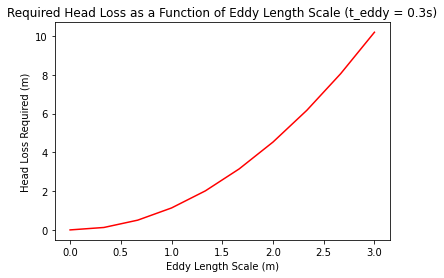

In [41]:
#graphing energy dissipation rate (edr) as a function of eddy length scale
eddy_length_scale = (np.linspace(0, 3, 10))*(u.m)
head_loss_req = (((eddy_length_scale/t_eddy)**2)/u.gravity).to(u.m)

#plot of average energy dissipation rate as a function of eddy length scale
fig, ax = plt.subplots()
ax.plot(eddy_length_scale, head_loss_req, 'r-')
plt.xlabel('Eddy Length Scale (m)')
plt.ylabel('Head Loss Required (m)')
plt.savefig('Energy loss as a function of eddy length scale')
plt.title('Required Head Loss as a Function of Eddy Length Scale (t_eddy = 0.3s)')
plt.show()

**Preliminary Design - Hydraulic Jump**

Below are some prelinary calculations estimating the power dissipation in a hydraulic jump (given maximum flow).  The influent Froude number was chosen on 4.5 based on a Portland State University study citing this as number the lowest Froude number supporting fully developed hydraulic jump.  V2 (velocity after the jump) was chosen arbitrarily.  The number "1" refers to flow before the jump and "2" refers to flow after the jump. More modeling is required to determine the headloss incurred by the hydraulic jump, the number of channels which should be present in the design, and the degree of mixing which is attained. 

[/Monroe/]: # (I think it will take a lot of energy to create a hydraulic jump and am not convinced that it is a good option. Can you calculate the minimum energy required to create a hydraulic jump? - Okay I added the print statement below where you calculated the change in Energy Grade Line and got 37 m. Confirms that we might have a problem with hydraulic jumps. You could calculate the minimum energy that you could use to create a hydraulic jump and possibly demonstrate that it isn't viable.  It is SOOOO important to calculate the parmeters that connect with the constraints.)

[/Dominic/]: # (Okay, I will try and demonstrate that it is not a viable option.  I was just trying to explore different.  I will use a lower Froude number.  Before, I had used the highests recommended Froude number) 

[/Monroe/]: # (It is not a good practice to redefine constants and to create multiple copies of variables that have the same value. Why not simple use fmt.q_max in your code? Certainly don't keep on redefining gravity.)


[/Dominic/]: # (Okay! I am trying to make a graph of minimum required headloss to maintain a hydraulic jump as a function of channel width.  Since the number of hydraulic jump channels will be determined by the number of treatment trains determined optimal for flocculation, channel width is the variable design parameter.  Once the optimal width of channels given maximum flow rate is found, I will determine the minimum headloss required to maintain a hydraulic jump. Finally, I will create a graph of minimum headloss required-given the already calculated channel width- as a function of flow rate through the plant.  This will give us a good idea of range of possible headloss requirements under different flow rates.  It is possible that this could be viable- given wide channel widths; however, it will be dependent on available plan area.  Plan area will be calculated last)

[/Dominic/]: # (NOTE: I have been a little stuck on this portion do to difficulties getting the arrays the same size in order to graph at the end)

[/Dominic/]: # (After our video call we decided it would be fine just to demonstrate that this option is not valid based on the fact that it does not meet the headloss constraints for the plant)



In [38]:
#MINIMUM HEAD REQUIRED USING SPECIFIED DESIGN PARAMETERS

def min_head_req_hydraulic_jump(F1, flow_rate, channel_width, treatment_trains, V2):
  """Calculates the minimum head required to support a rapid mix hydraulic jump
  subject to the following conditions:
    ----------------------------
    - F1: float
        - Minimum Froude number required in order to sustain a hydraulic jump
    - flow_rate: float (units of volume per time)
        - The maximum flow rate that is expected through the plant (fmt.q_max)
    - channel_width: float
        - The width of an individual hydraulic jump (constrained by available 
          plan view area) 
    - treatment_trains: int
        - Number of treatment trains deemed necessary for flocculation.  There will
          be one rapid mix hydraulic jump per flocculation channel
    - V2: float (units of length per time)
        - The maximum exit velocity from hydraulic jump as determined by hydraulics
          team
    -----------------------------
    Note: plan_view_area_hydraulic_jump does not account for any additional 
    length that may be required before or after the jump.  It also does not account
    for any additional width that may be required during construction. Any variable 
    name with a number 1 before it refers to before the hydraulic jump while a 
    2 refers to it being after the hydraulic jump
  """
  #calculate flow through each jump given flow rate and number of trains
  max_flow_per_unit = flow_rate/treatment_trains
  #calculate ratio of height before and after jump (Y1 and Y2) with F1
  height_ratio = 0.5 * (((1+8*(F1**2))**0.5) - 1)
  V1 = V2 * height_ratio
  Y1 = max_flow_per_unit/(channel_width*V1)
  F2 = V2/(u.gravity*(height_ratio*Y1))**0.5
  #calculate length of the hydraulic jump
  L = 220 * Y1 * np.arctanh((F1-1)/22)
  Y2 = height_ratio * Y1
  #calculate angle of the jump for calculating head
  theta = np.arctan((Y2-Y1)/L)
  #calculate minimum required head to maintain hydraulic jump
  Et1 = Y1*np.cos(theta) + (V1**2)/(2*u.gravity)
  Et2 = Y2*np.cos(theta) + (V2**2)/(2*u.gravity)
  energy_difference = Et2 - Et1
  plan_view_area_hydraulic_jump = ((L*channel_width)*treatment_trains).to(u.m**2)
  print('the minimum required headloss given design parameters is', energy_difference)
  print('the minimum total plan view area required is', plan_view_area_hydraulic_jump)
  return energy_difference, plan_view_area_hydraulic_jump

F1 = 4.5
flow_rate = fmt.q_max
channel_width = 5 * (u.m)
treatment_trains = 8
V2 = 0.3 * (u.m/u.s)

min_head_req_hydraulic_jump(F1, flow_rate, channel_width, treatment_trains, V2)


the minimum required headloss given design parameters is 1.243 kiloliter / meter ** 2
the minimum total plan view area required is 407.7 meter ** 2


(<Quantity(1.2426774485278158, 'kiloliter / meter ** 2')>,
 <Quantity(407.7442620419458, 'meter ** 2')>)

# **Rapid Mix Hydraulic - Potential Energy**

Authors: Cynthia Chu, Dominic Grasso, Yitzy Bitzyspider

Team Name: Many Power Corgi Mode

[/Monroe/]: # (Good work exploring hydraulic jump. As you gain more experience you will use the early exploration to very quickly check feasibility so you know whether or not to continue exploring that option. For the hydraulic jump the question is whether their is enough energy available to power a hydraulic jump. Your first design suggests you might have a real problem! But that is great. Check to see if you made any bad assumptions about water depths and if this is the minimum amount of energy that is needed by a hydrualic jump, then you document that including equations in Latex and then move on to a more energy efficiency design. In this case you need to use less energy and thus the maximum velocity in the constricted flow must be MUCH lower.) 

[/Monroe/]: # (When you respond to my comments make the change in the report instead of only addressing it in another comment.)

[/Monroe/]: # (Before writing code show the equations in Latex in Markdown and explain what you are solving for. Showing the equations that you are using is easy and so helpful. I've inserted one equation from the AguaClara textbook below to show how easy it is. NO need to type ANY Latex!)



[/Monroe/]: # (Push forward quickly on the flocculator design. Consider creating functions for the flocculator design so that you can easily create graphs showing a range of designs. For example the number of treatment trains could be a variable that you might explore.)


###**Background**

Flocculation is widely used in water treatment because of the use of sedimentation to remove particles from the water. Flocculation aims to increase the diameter of the particles through applying coagulant during rapid mix.Hydraulic flocculators use a series of baffles in order to generate mixing. In hydraulic flocculation, in order to facilitate particle collisions, we must design a flocculator that takes into account collision potential and energy dissipation rate.

Based on the AguaClara hydraulic flocculation model, we use the physics of the interactions between particles, dissolved organic molecules, and coagulant nanoparticles that flow through the system. In our design, we use a horizontal flow hydraulic flocculator. Critical design criteria and equations used are listed below.


[INCLUDE DIAGRAM]


###**Critical Design Criteria**



### *Input Parameters*
Our input parameters for our hydraulic flocculator design are:
$Q$ - flow rate

$T$ - temperature

$G_{\theta}$ - design collision potential rate

$H_{L}$ - head loss

$H_{channel}$ - height of channel

$H_{influent}$ - influent height

$n_{treatment\,trains}$ - number of treatment trains

$n_{redundant}$ - number of redundant treatment trains

### *Output Parameters*
Output parameters we will calculate are:

$\bar G$ - average velocity gradient

$ \theta $ - retention time

$ Q_{TOT}$ - total flow rate

$Q_{treatment\,train}$ - treatment train flow rate

$V_{TOT}$ - total volume

$V_{treatment\,train}$ - treatment train volume

$A_{side\,view}$ - side view area

$A_{plan\,view\,area}$ - plan view area of the flocculator

$A_{treatment\,train}$ - treatment train area

$L_{channel}$ - length of the channel

$W_{channel}$ - width of the channel

$W_{baffle}$ - width of each baffle

$S_{baffles}$ - spacing between the baffles

$H_{effluent}$ - effluent height

$V_{scour}$ - scour velocity


###*Temperature and Flow Rate Variation Analysis*

We will do two analyses on variation in temperature and flow rate. Temperature is used to calculate the viscosity, which is important for the velocity gradient. We can use the stream gauge data to get the water temperature and averages for a certain number of years. We will run three different water temperatures for the flocculator, a minimum, maximum, and average. We will analyze the variation in number of treatment trains.
For our analysis on flow rate, we will look at three different flow rates - a minimum, maximum, and average. We will analyze the variation in number of treatment trains based on flow rate variation.
Being that our flocculator is designed with a given headloss, the effluent height and so the entrance height for the sedimentation tanks is purely a function of the influent height, which is in turn a function of flow rate and headloss through the rapid mix.

### **Design Equations for Hydraulic Flocculator Design**

Equations 1-3 from AguaClara textbook [eqns 383-385](https://aguaclara.github.io/Textbook/Flocculation/Floc_Design.html#equation-flocculation-floc-design-15).


**1. For average velocity gradient $\bar G$:**
$$ \bar G^2 = \frac{g h_{L_{floc}}}{\nu G_{t}} $$

**2. Hydraulic retention time:**
$$ \theta = \frac{G_{t}}{\bar G} $$

**3. Total design volume of flocculator:**
$$ V_{design\,tot} = Q * \theta $$

**4. Volume of each treatment train in flocculator:**
$\textit{without redundancy}$
$$ V_{treatment\,train} = \frac{V_{tot}}{n_{treatment\,trains}}$$


**5. Total volume of floccutor:**
$$ V_{tot} = \frac{V_{treatment\,trains}}{n_{treatment\,trains}} $$

**6. Total flow rate through flocculator:**
$$ Q_{tot} = \frac{Q_{treatment\,train}}{n_{treatment\,trains}} $$

**7. Width of channel with predesigned height:**

Based on [equation](https://aguaclara.github.io/Textbook/Flocculation/Floc_Design.html#equation-flocculation-floc-design-25) for the design of the flocculator.
$$H_{e_{Max}} = \left[ \frac{K}{2 \nu G_{CS}^2} \left( \frac{Q \Pi_{{HS}_{Max}}}{W_{channel}} \right)^3 \right]^\frac{1}{4}$$

Reaarranged:

$$W_{channel} = \left[ \frac{K}{2 \nu \bar G^2} \left( \frac{Q \Pi_{{HS}_{Max}}}{H_{channel}} \right)^3 \right]^\frac{1}{4}$$

**8. Spacing between baffles:**
$$ S_{baffles}=\frac{W_{channel}}{\Pi_{{HS}_{Max}}}$$

**9. Length of channel:**
with predesigned height and calculated width
$$ L_{channel}=\frac{V_{treatment\,train}}{W_{channel}\,H_{channel}}$$

**10. Side view area of flocculator:**
$$ A_{side\,view} = \frac{V_{treatment\,train}}{W_{channel}}$$

**11. Plan view area of each treatment train:**
$$ A_{plan\,view}=\frac{V_{treatment\,train}}{H_{channel}}$$

**12. Total plan view area:**
$$ A_{tot}=W_{channel} L_{channel} n_{treatment\,trains} $$

**13. Number of baffles in each treatment train:**
$$ n_{baffles} = \frac{L_{channel}}{S_{baffles}}$$

**14. Scour velocity:**
$$ V_{scour} = \frac{Q_{treatment\,train}}{H_{channel}\,S_{baffles}}$$

**15. Effluent height of water:**
$$ H_{effluent}= H_{influent} - H_{L} $$

##**Results**

[/Monroe/]: # (Comment on the results of your design calculaions. Check whether or not the design is reasonable. Reasonable is defined by constraints of the project and goals of reducing cost and resource use.)

[/Yitzy/]: # (include info on the output excel)

In [42]:
from google.colab import files
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py

--2020-05-18 03:22:22--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3057 (3.0K) [text/plain]
Saving to: ‘Fairmont.py.1’

Fairmont.py.1       100%[===================>]   2.99K  --.-KB/s    in 0s      

2020-05-18 03:22:22 (56.8 MB/s) - ‘Fairmont.py.1’ saved [3057/3057]



In [0]:
#HydraulicFlocculator Code
class HydraulicFlocculator:
    """Calculates physical dimensions of a Hydraulic Flocculator
    ----------------------------
    - BAFFLE_K (K or K_{baffle}): float
        - The minor loss coefficient of the flocculator baffles.
    - RATIO_MAX_WS (\Pi_{WS}): float
        - The maximum ratio between expansion width and baffle spacing
    """

    BAFFLE_K = 4
    RATIO_MAX_WS = 3

    def __init__(
            self,
            Q=1 * u.L/u.s,
            temp=25 * u.degC,
            Gt=37000,
            headloss = 0.4 * u.m,
            channel_H = 4 * u.m,
            influent_H = 4 * u.m,
            n_treatment_trains = 1,
            n_redundancy = 1):

        self.Q = Q
        self.temp = temp
        self.Gt = Gt
        self.headloss = headloss
        self.channel_H = channel_H
        self.influent_H = influent_H
        self.n_treatment_trains = n_treatment_trains
        self.n_redundancy = n_redundancy

    @property
    def vel_grad_avg(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculate the average velocity gradient (G-bar) of water flowing
        through the flocculator.
        :returns: Average velocity gradient (G-bar)
        :rtype: float * 1 / second
        """
        return ((u.standard_gravity * self.headloss) /
               (ac.viscosity_kinematic_water(self.temp) * self.Gt)).to(u.s ** -1)

    @property
    def retention_time(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculates the hydraulic retention time neglecting the volume created by head loss in the flocculator.
        :returns: Hydraulic retention time (:math:`\theta`)
        :rtype: float * second
        """
        return (self.Gt / self.vel_grad_avg).to(u.s)

    @property
    def design_total_vol(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculates the total volume of the flocculator.
        :returns: Total volume
        :rtype: float * meter ** 3
        """
        return (self.Q * self.retention_time).to(u.m ** 3)

    @property
    def treatment_train_vol(self):
        """Calculates the volume of each treatment train in the flocculator.
        :returns: Volume of each treatment train
        :rtype: float * meter ** 3
        """
        if (self.n_treatment_trains - self.n_redundancy) <= 1:
          return (self.design_total_vol/(self.n_treatment_trains)).to(u.m ** 3)
        else:
          return (self.design_total_vol/(self.n_treatment_trains-self.n_redundancy)).to(u.m ** 3)

    @property
    def treatment_train_flow(self):
        """Calculates the flowrate through each treatment train in the flocculator.
        :returns: Flowrate through each treatment train
        :rtype: float * liter / second
        """
        if (self.n_treatment_trains - self.n_redundancy) <= 1:
          return (self.Q/(self.n_treatment_trains)).to(u.L/u.s)
        else:
          return (self.Q/(self.n_treatment_trains-self.n_redundancy)).to(u.L/u.s)

    @property
    def total_vol(self):
        """Calculates the total volume of the flocculator.
        :returns: Total volume of the flocculator
        :rtype: float * meter ** 3
        """
        if (self.n_treatment_trains - self.n_redundancy) <= 1:
          return (self.treatment_train_vol*self.n_treatment_trains).to(u.m ** 3)
        else:
          return (self.treatment_train_vol*self.n_treatment_trains).to(u.m ** 3)

    @property
    def total_flow(self):
        """Calculates the total flowrate through the flocculator.
        :returns: Total flowrate through the flocculator
        :rtype: float * liter / second
        """
        if (self.n_treatment_trains - self.n_redundancy) <= 1:
          return (self.treatment_train_flow*self.n_treatment_trains).to(u.L/u.s)
        else:
          return (self.treatment_train_flow*self.n_treatment_trains).to(u.L/u.s)

    @property
    def channel_W(self):
        #NOTE: This is borrowed from AguaClara source code
        """Calculates the width of the channel with a predesigned height.
        :returns: Width of the channel
        :rtype: float * meter
        """
        return (((self.RATIO_MAX_WS**3*self.treatment_train_flow**3*self.BAFFLE_K)/
                (self.channel_H**3*2*ac.viscosity_kinematic_water(self.temp)*self.vel_grad_avg**2))**(1/4)).to(u.m)

    @property
    def baffle_S(self):
        #NOTE: This is borrowed from AguaClara source code
        """Calculates the spacing between baffles.
        :returns: Spacing between baffles
        :rtype: float * meter
        """
        return (self.channel_W/self.RATIO_MAX_WS).to(u.m)

    @property
    def baffle_W(self):
        """Calculates the width of the channel with a predesigned height.
        :returns: Width of the channel
        :rtype: float * meter
        """
        return (self.channel_W-self.baffle_S).to(u.m)

    @property
    def channel_L(self):
        """Calculates the length of the channel with a predesigned height and a calculated width.
        :returns: Length of the channel
        :rtype: float * meter
        """
        return (self.treatment_train_vol/(self.channel_W*self.channel_H)).to(u.m)
        
    @property
    def side_view_area(self):
        """Calculates the side view area of the flocculator.
        :returns: Side view area
        :rtype: float * meter ** 2
        """
        return (self.treatment_train_vol/self.channel_W).to(u.m**2)
    
    @property
    def treatment_train_plan_view_area(self):
        """Calculates the plan view area of each treatment train.
        :returns: Plan view are of treatment train
        :rtype: float * meter ** 2
        """
        return (self.treatment_train_vol/self.channel_H).to(u.m**2)

    @property
    def total_plan_view_area(self):
        """Calculates the plan view area of the flocculator
        :returns: Plan view are of flocculator
        :rtype: float * meter ** 2
        """
        return (self.channel_W*self.channel_L*self.n_treatment_trains).to(u.m**2)

    @property
    def baffle_n(self):
        """Calculates the number of the baffles in each treatment train.
        :returns: Number of baffles in treatment train
        :rtype: float * dimensionless
        """
        return (np.ceil((self.channel_L/self.baffle_S))).to(u.dimensionless)

    @property
    def vel_scour(self):
        """Calculates the velocity in the flocculator.
        :returns: Velocity in flocculator
        :rtype: float * meter / second
        """
        return (self.treatment_train_flow/(self.channel_H*self.baffle_S)).to(u.m/u.s)

    @property
    def effluent_H(self):
        """Calculates the effluent height of the water.
        :returns: Height of effluent water
        :rtype: float * meter
        """
        return (self.influent_H-self.headloss).to(u.m)

    @property
    def design(self):
        """Returns the designed values.
        :returns: list of designed values
        :rtype: dictionary
        """
        floc_dict = {'G': self.vel_grad_avg,
                     't': self.retention_time,
                     'total_flow': self.total_flow,
                     'treatment_train_flow': self.treatment_train_flow,
                     'total_vol': self.total_vol,
                     'treatment_train_vol': self.treatment_train_vol,
                     'side_view_area': self.side_view_area,
                     'total_plan_view_area': self.total_plan_view_area,
                     'treatment_train_plan_view_area': self.treatment_train_plan_view_area,
                     'channel_L': self.channel_L,
                     'channel_W': self.channel_W,
                     'baffle_S': self.baffle_S,
                     'baffle_W': self.baffle_W,
                     'baffle_n': self.baffle_n,
                     'effluent_H': self.effluent_H,
                     'vel_scour': self.vel_scour}
                     
        return floc_dict

#Analysis Intention

The intention of the analysis was twofold: First, analyze our calculations for the fairmont treatment plant. Second, create an analysis system that is easy to adapt for any of the desired input parameters.

As a conseequence of these goals we decided that instead of using python code to do the comparison with graphs and figures, we'd output a data frame to excel which is more universally workable. Comparison can then be taken by whomever downloads the excel.

#Fairmont Analysis

We varied three parameters; flowrate, temperature, and the number of treatment trains. 

Below are two sample outputs from our design briefly demonstrated in onshape. There are a few errors with the outputs but thats the fault of my poor onshape skill not that of the code. 

These pictures are purely for demonstration only.

![alt text](https://github.com/yyr2/pics4520/blob/master/Annotation%202020-05-16%20213013.png?raw=true)

![alt text](https://github.com/yyr2/pics4520/blob/master/Annotation%202020-05-16%20215831.png?raw=true)

The following parameters were the inputs for the above drawing.

* flowrate = 720 cfs
* temperature = 24.4 C
* G theta = 37000 
* headloss through flocculator = 0.4 m
* channel height = 4 m
* number of treatment trains = 9
* number of redudant treatment trains = 2

In the above onShape drawings we can clearly see that the amount of space required to house the whole flocculator is very resonable as is the induced head. 

It is highley recommended that a hydraulic flocculator be considered and evaluated against alternatives.

Note: The velocity necessary to prevent unwanted sedimentation of formed flocs is higher than the standard 0.5 ft/s in all flow rates designed.

#Future Work

Our code outputs a design. It is essential that once a design is outputed its performance be evaluated across varying flowrates and temperatures.

Its wrongly assumed that the baffles and and suporting chanel walls have no width.

When dividing the flow rate among to different channels our code can't work around when redundancy is equal to the number of treament trains.

Won't provide errors if velocity is below "scour velocity".

Won't provide errors for wrong inputs, only multipliction errors.

We've include precoded "for loops" for varying various inputs for the excel. Use on creating and appending dataframes is necessary for building the right size excel. Perhaps creating a function that just requires the input ranges and the outputs an n*m data frame that the user can then manipulate to get the relevant information may be useful.


In [0]:
# Analysis for Fairmont

input_Q = fmt.q_max
input_temp = 15
input_Gt = 37000
input_headloss = 0.4
input_channel_H = 4
input_n_treatment_trains = 8
input_n_redudency = 1

row_names =  ['Design Temperature',
              'Design Flowrate',
              'Flowrate per Treatment Train',
              'Total Flowrate',
              'Scour Velocity', 
              'Total Volume',
              'Volume per Treatment Train',
              'Total Plan View Area',
              'Side View Area', 
              'Treatment Train Plan View Area',
              'Flocculator Influent Water Height',
              'Flocculator Effluent Water Height',
              'Channel Length', 
              'Channel Width', 
              'Channel Height', 
              'Baffle Spacing', 
              'Baffle Width', 
              'Number of Baffles',
              'Number of Redundant Treatment Trains',
              '']

totaldf=pd.DataFrame()
df=pd.DataFrame()
HF_data = HydraulicFlocculator( Q = input_Q.to(u.L/u.s),
                                temp = input_temp*u.degC,
                                Gt = input_Gt*u.dimensionless,
                                headloss = input_headloss*u.m,
                                channel_H = input_channel_H*u.m,
                                n_treatment_trains = input_n_treatment_trains,
                                n_redundancy = input_n_redudency*u.dimensionless)
  
data = [HF_data.temp.magnitude,
        HF_data.Q.magnitude,
        HF_data.treatment_train_flow.magnitude,
        HF_data.total_flow.magnitude,
        HF_data.vel_scour.magnitude,
        HF_data.total_vol.magnitude,
        HF_data.treatment_train_vol.magnitude,
        HF_data.total_plan_view_area.magnitude,
        HF_data.side_view_area.magnitude,
        HF_data.treatment_train_plan_view_area.magnitude,
        HF_data.influent_H.magnitude,
        HF_data.effluent_H.magnitude,
        HF_data.channel_L.magnitude,
        HF_data.channel_W.magnitude,
        HF_data.channel_H.magnitude,
        HF_data.baffle_S.magnitude,
        HF_data.baffle_W.magnitude,
        HF_data.baffle_n.magnitude,
        HF_data.n_redundancy.magnitude,
        '']
df[str(input_n_treatment_trains)+' Treatment Trains'] = pd.Series(data,index=row_names)

row_units =  [HF_data.temp.units,
              HF_data.Q.units,
              HF_data.treatment_train_flow.units,
              HF_data.total_flow.units,
              HF_data.vel_scour.units,
              HF_data.total_vol.units,
              HF_data.treatment_train_vol.units,
              HF_data.total_plan_view_area.units,
              HF_data.side_view_area.units,
              HF_data.treatment_train_plan_view_area.units,
              HF_data.influent_H.units,
              HF_data.effluent_H.units,
              HF_data.channel_L.units,
              HF_data.channel_W.units,
              HF_data.channel_H.units,
              HF_data.baffle_S.units,
              HF_data.baffle_W.units,
              HF_data.baffle_n.units,
              HF_data.n_redundancy.units,
              '']

df['Units'] = pd.Series(row_units,index=row_names)
totaldf = totaldf.append(df)

print(totaldf)

print('At lowest flow rate in design for highest flowrate we have the following:\n')

t_t_flow = fmt.q_min/input_n_treatment_trains
print('Flow per treatment train =', t_t_flow.to(u.L/u.s))

res_t = (HF_data.treatment_train_vol/t_t_flow).to(u.min)
print('Residence time =',res_t)

G_bar = np.sqrt(u.standard_gravity*(input_headloss*u.m)/(ac.viscosity_kinematic_water(input_temp*u.degC)*res_t)).to(1/u.min)
print('G Bar = ',G_bar)

G_theta = (res_t*G_bar).to(u.dimensionless)
print('G Theta =',G_theta)

vel_s = t_t_flow/(HF_data.channel_H*HF_data.baffle_S)
print('Velocity per treatment train =',vel_s.to(u.m/u.s))

                                     8 Treatment Trains           Units
Design Temperature                                   15            degC
Design Flowrate                               2.039e+04  liter / second
Flowrate per Treatment Train                      2,913  liter / second
Total Flowrate                                 2.33e+04  liter / second
Scour Velocity                                   0.3223  meter / second
Total Volume                                      9,246      meter ** 3
Volume per Treatment Train                        1,156      meter ** 3
Total Plan View Area                              2,312      meter ** 2
Side View Area                                    170.6      meter ** 2
Treatment Train Plan View Area                    288.9      meter ** 2
Flocculator Influent Water Height                     4           meter
Flocculator Effluent Water Height                   3.6           meter
Channel Length                                    42.64         

In [0]:
# Designs for Fairmont with variying flowrates, temperatures, and treatment train numbers.

input_Q = [fmt.q_min,fmt.q_ave,fmt.q_max] #[min avg max] #Scope of work
input_temp = [15, 31.3] #[min avg max] #USGS streamflow avged over 60 years 
input_Gt = 37000
input_headloss = 0.4
input_channel_H = 4
input_n_treatment_trains = 10
input_n_redudency = 1

row_names =  ['Design Temperature',
              'Design Flowrate',
              'Flowrate per Treatment Train',
              'Total Flowrate',
              'Scour Velocity', 
              'Total Volume',
              'Volume per Treatment Train',
              'Total Plan View Area',
              'Side View Area', 
              'Treatment Train Plan View Area',
              'Flocculator Influent Water Height',
              'Flocculator Effluent Water Height',
              'Channel Length', 
              'Channel Width', 
              'Channel Height', 
              'Baffle Spacing', 
              'Baffle Width', 
              'Number of Baffles',
              'Number of Redundant Treatment Trains',
              '']

totaldf=pd.DataFrame()
df=pd.DataFrame()
for q in range(1,len(input_Q)+1):
  for t in range(1,len(input_temp)+1):  
    for ntt in range(1,input_n_treatment_trains+1):
      HF_data = HydraulicFlocculator( Q = input_Q[q-1].to(u.L/u.s),
                                      temp = input_temp[t-1]*u.degC,
                                      Gt = input_Gt*u.dimensionless,
                                      headloss = input_headloss*u.m,
                                      channel_H = input_channel_H*u.m,
                                      n_treatment_trains = ntt,
                                      n_redundancy = input_n_redudency*u.dimensionless)
        
      data = [HF_data.temp.magnitude,
              HF_data.Q.magnitude,
              HF_data.treatment_train_flow.magnitude,
              HF_data.total_flow.magnitude,
              HF_data.vel_scour.magnitude,
              HF_data.total_vol.magnitude,
              HF_data.treatment_train_vol.magnitude,
              HF_data.total_plan_view_area.magnitude,
              HF_data.side_view_area.magnitude,
              HF_data.treatment_train_plan_view_area.magnitude,
              HF_data.influent_H.magnitude,
              HF_data.effluent_H.magnitude,
              HF_data.channel_L.magnitude,
              HF_data.channel_W.magnitude,
              HF_data.channel_H.magnitude,
              HF_data.baffle_S.magnitude,
              HF_data.baffle_W.magnitude,
              HF_data.baffle_n.magnitude,
              HF_data.n_redundancy.magnitude,
              '']
      df[str(ntt)+' Treatment Trains'] = pd.Series(data,index=row_names)

    row_units =  [HF_data.temp.units,
                  HF_data.Q.units,
                  HF_data.treatment_train_flow.units,
                  HF_data.total_flow.units,
                  HF_data.vel_scour.units,
                  HF_data.total_vol.units,
                  HF_data.treatment_train_vol.units,
                  HF_data.total_plan_view_area.units,
                  HF_data.side_view_area.units,
                  HF_data.treatment_train_plan_view_area.units,
                  HF_data.influent_H.units,
                  HF_data.effluent_H.units,
                  HF_data.channel_L.units,
                  HF_data.channel_W.units,
                  HF_data.channel_H.units,
                  HF_data.baffle_S.units,
                  HF_data.baffle_W.units,
                  HF_data.baffle_n.units,
                  HF_data.n_redundancy.units,
                  '']

    df['Units'] = pd.Series(row_units,index=row_names)
    totaldf = totaldf.append(df)

print(totaldf)

totaldf.to_excel('HydraulicFlocculator.xlsx') 
files.download('HydraulicFlocculator.xlsx')

                                     1 Treatment Trains  ...           Units
Design Temperature                                   15  ...            degC
Design Flowrate                                   2,629  ...  liter / second
Flowrate per Treatment Train                      2,629  ...  liter / second
Total Flowrate                                    2,629  ...  liter / second
Scour Velocity                                   0.3142  ...  meter / second
...                                                 ...  ...             ...
Baffle Spacing                                    8.845  ...           meter
Baffle Width                                      17.69  ...           meter
Number of Baffles                                     6  ...   dimensionless
Number of Redundant Treatment Trains                  1  ...   dimensionless
                                                         ...                

[120 rows x 11 columns]


In [0]:
#Precoded 'for loops' for varying inputs

input_Q = []
input_temp = [] 
input_Gt = []
input_headloss = []
input_channel_H = []
input_n_treatment_trains = 8
input_n_redudency = 2

for q in range(1,len(input_Q)+1):
  for t in range(1,len(input_temp)+1):
    for g in range(1,len(input_Gt)+1):
      for h in range(1,len(input_headloss)+1):
        for ch in range(1,len(input_channel_H)+1):
          for ntt in range(1,input_n_treatment_trains+1):
            for nr in range(1,input_n_redudency+1):
              HF_data = HydraulicFlocculator( Q = input_Q[q-1].to(u.L/u.s),
                                temp = input_temp[t-1]*u.degC,
                                Gt = input_Gt[g-1]*u.dimensionless,
                                headloss = input_headloss[h-1]*u.m,
                                channel_H = input_channel_H[ch-1]*u.m,
                                n_treatment_trains = ntt,
                                n_redundancy = nr*u.dimensionless)

#**Design - Hydraulic Flocculation**


#Background
Flocculation is widely used in water treatment because of the use of sedimentation to remove particles from the water. Flocculation aims to increase the diameter of the particles through applying coagulant during rapid mix. In order to facilitate particle collisions, we must design a flocculator that takes into account collision potential and energy dissipation rate.

info about hydraulic vs mechanical?


# Critical Design Criteria
Our input parameters for our hydraulic flocculator design are number of treatment trains, flow rate, turbidity, downstream height.
These are the priorities that we will base the rest of the design around.

[/Cynthia/]: # (is this maximum flow rate / turbidity?)

Physical dimensions: We will calculate the length of the channel, amount of channels, and actual channel width.

Hydraulic parameters: He, distance between baffle/obstacle induced flow expansions, nobstacles - amount of obstacles per baffle space, and S- baffle spacing (distance between baffles).

[Include diagram & equations used]

Output parameters we will calculate are plan view area of the flocculator, length of the channels, width of the channel, width of each baffle, and spacing between the baffles.
In our analysis, we will take into account the number of treatment trains, variation of flow rates, turbidity, and downstream H of the flocculation tank. In our design, we will use a horizontal hydraulic flocculator. We will use a residence time of 7.5 minutes, minimum width of 4 meters, and a flow rate of 720 cubic feet per second.
Outputs from our analysis will include the plan view area of the tank, the length of the channels, width of the channel, width and spacing of the baffles.

[/Monroe/]: # (Here you make assumptions about the water temperature. Temperature is an important parameter and should be discussed. You've broken dependency by redefining the flow rate.)

[/Yizty/]: # (We redid the code for the min avg, max avg, and avg avg temperature using usgs stream gauge data from 1983-2019.)

#Temperature and Flow Rate Variation Analysis
We will do two analyses on variation in temperature and flow rate.
Temperature is used to calculate the viscosity, which is important for the velocity gradient. We can use the stream gauge data to get the water temperature and averages for a certain number of years. We will run three different water temperatures for the flocculator, a minimum, maximum, and average. We will analyze the variation in number of treatment trains.

For our analysis on flow rate, we will look at three different flow rates - a minimum, maximum, and average. We will analyze the variation in number of treatment trains based on flow rate variation.

Depending on how many treatment trains we decide on (and if time permits), we will decide on a head at the end of the train for the sedimentation tanks.

[/Monroe/]: # (Presumably you want to design a flocculator based on the number of flocculators and the max flow. Those parameters are already defined in fmt.)

[/Yizty/]: # (Done.)

[/Monroe/]: # (What happened? You calculated a preliminary design last night and now the code isn't working.I fixed it by commenting the comments.) 

[/Yizty/]: # (Done.)

[/Monroe/]: # (AguaClara code is now accessed by using ac. for ALL of our code. I changed this in the call to viscosity below.)

[/Yizty/]: # (Done.)

[/Monroe/]: # (Consider writing your own code because the design is much simpler than the AguaClara design process. You don't have the constraints of length and width and thus you can do a very simple straightforward design. Try it!)

[/Yizty/]: # (This is my own code lol. I repurposed the code I wrote for the Floculatorita project in 4520. I made everything work around solving for W.)